In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106


In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106


In [5]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106
Cascade length:  1681
New Orders left:  1320425
making new cascade


OG Orders left:  1320425
Cascade length:  2
New Orders left:  1320423
making new cascade


OG Orders left:  1320423
Cascade length:  1250
New Orders left:  1319173
making new cascade


OG Orders left:  1319173
Cascade length:  1526
New Orders left:  1317647
making new cascade


OG Orders left:  1317647
Cascade length:  2
New Orders left:  1317645
making new cascade


OG Orders left:  1317645
Cascade length:  1312
New Orders left:  1316333
making new cascade


OG Orders left:  1316333
Cascade length:  2
New Orders left:  1316331
making new cascade


OG Orders left:  1316331
Cascade length:  1605
New Orders left:  1314726
making new cascade


OG Orders left:  1314726
Cascade length:  1357
New Orders left:  1313369
making new cascade


OG Orders left:  1313369
Cascade length:  1
New Orders left:  1313368
making new cascade


OG Orders left:  1313368
Cascade length:  7
New Orders left:  1313361
ma

Cascade length:  13
New Orders left:  1277270
making new cascade


OG Orders left:  1277270
Cascade length:  673
New Orders left:  1276597
making new cascade


OG Orders left:  1276597
Cascade length:  434
New Orders left:  1276163
making new cascade


OG Orders left:  1276163
Cascade length:  76
New Orders left:  1276087
making new cascade


OG Orders left:  1276087
Cascade length:  3
New Orders left:  1276084
making new cascade


OG Orders left:  1276084
Cascade length:  1
New Orders left:  1276083
making new cascade


OG Orders left:  1276083
Cascade length:  43
New Orders left:  1276040
making new cascade


OG Orders left:  1276040
Cascade length:  11
New Orders left:  1276029
making new cascade


OG Orders left:  1276029
Cascade length:  675
New Orders left:  1275354
making new cascade


OG Orders left:  1275354
Cascade length:  1
New Orders left:  1275353
making new cascade


OG Orders left:  1275353
Cascade length:  1044
New Orders left:  1274309
making new cascade


OG Orders l

Cascade length:  16
New Orders left:  1246984
making new cascade


OG Orders left:  1246984
Cascade length:  145
New Orders left:  1246839
making new cascade


OG Orders left:  1246839
Cascade length:  32
New Orders left:  1246807
making new cascade


OG Orders left:  1246807
Cascade length:  390
New Orders left:  1246417
making new cascade


OG Orders left:  1246417
Cascade length:  433
New Orders left:  1245984
making new cascade


OG Orders left:  1245984
Cascade length:  383
New Orders left:  1245601
making new cascade


OG Orders left:  1245601
Cascade length:  297
New Orders left:  1245304
making new cascade


OG Orders left:  1245304
Cascade length:  328
New Orders left:  1244976
making new cascade


OG Orders left:  1244976
Cascade length:  16
New Orders left:  1244960
making new cascade


OG Orders left:  1244960
Cascade length:  288
New Orders left:  1244672
making new cascade


OG Orders left:  1244672
Cascade length:  740
New Orders left:  1243932
making new cascade


OG Or

Cascade length:  6
New Orders left:  1227075
making new cascade


OG Orders left:  1227075
Cascade length:  1
New Orders left:  1227074
making new cascade


OG Orders left:  1227074
Cascade length:  75
New Orders left:  1226999
making new cascade


OG Orders left:  1226999
Cascade length:  3
New Orders left:  1226996
making new cascade


OG Orders left:  1226996
Cascade length:  4
New Orders left:  1226992
making new cascade


OG Orders left:  1226992
Cascade length:  409
New Orders left:  1226583
making new cascade


OG Orders left:  1226583
Cascade length:  6
New Orders left:  1226577
making new cascade


OG Orders left:  1226577
Cascade length:  31
New Orders left:  1226546
making new cascade


OG Orders left:  1226546
Cascade length:  28
New Orders left:  1226518
making new cascade


OG Orders left:  1226518
Cascade length:  622
New Orders left:  1225896
making new cascade


OG Orders left:  1225896
Cascade length:  1
New Orders left:  1225895
making new cascade


OG Orders left:  

Cascade length:  351
New Orders left:  1210210
making new cascade


OG Orders left:  1210210
Cascade length:  500
New Orders left:  1209710
making new cascade


OG Orders left:  1209710
Cascade length:  5
New Orders left:  1209705
making new cascade


OG Orders left:  1209705
Cascade length:  334
New Orders left:  1209371
making new cascade


OG Orders left:  1209371
Cascade length:  20
New Orders left:  1209351
making new cascade


OG Orders left:  1209351
Cascade length:  258
New Orders left:  1209093
making new cascade


OG Orders left:  1209093
Cascade length:  184
New Orders left:  1208909
making new cascade


OG Orders left:  1208909
Cascade length:  444
New Orders left:  1208465
making new cascade


OG Orders left:  1208465
Cascade length:  4
New Orders left:  1208461
making new cascade


OG Orders left:  1208461
Cascade length:  192
New Orders left:  1208269
making new cascade


OG Orders left:  1208269
Cascade length:  125
New Orders left:  1208144
making new cascade


OG Orde

Cascade length:  348
New Orders left:  1188723
making new cascade


OG Orders left:  1188723
Cascade length:  225
New Orders left:  1188498
making new cascade


OG Orders left:  1188498
Cascade length:  34
New Orders left:  1188464
making new cascade


OG Orders left:  1188464
Cascade length:  6
New Orders left:  1188458
making new cascade


OG Orders left:  1188458
Cascade length:  106
New Orders left:  1188352
making new cascade


OG Orders left:  1188352
Cascade length:  6
New Orders left:  1188346
making new cascade


OG Orders left:  1188346
Cascade length:  69
New Orders left:  1188277
making new cascade


OG Orders left:  1188277
Cascade length:  22
New Orders left:  1188255
making new cascade


OG Orders left:  1188255
Cascade length:  704
New Orders left:  1187551
making new cascade


OG Orders left:  1187551
Cascade length:  745
New Orders left:  1186806
making new cascade


OG Orders left:  1186806
Cascade length:  471
New Orders left:  1186335
making new cascade


OG Orders

Cascade length:  215
New Orders left:  1170209
making new cascade


OG Orders left:  1170209
Cascade length:  2
New Orders left:  1170207
making new cascade


OG Orders left:  1170207
Cascade length:  462
New Orders left:  1169745
making new cascade


OG Orders left:  1169745
Cascade length:  18
New Orders left:  1169727
making new cascade


OG Orders left:  1169727
Cascade length:  380
New Orders left:  1169347
making new cascade


OG Orders left:  1169347
Cascade length:  599
New Orders left:  1168748
making new cascade


OG Orders left:  1168748
Cascade length:  357
New Orders left:  1168391
making new cascade


OG Orders left:  1168391
Cascade length:  73
New Orders left:  1168318
making new cascade


OG Orders left:  1168318
Cascade length:  307
New Orders left:  1168011
making new cascade


OG Orders left:  1168011
Cascade length:  587
New Orders left:  1167424
making new cascade


OG Orders left:  1167424
Cascade length:  2
New Orders left:  1167422
making new cascade


OG Order

Cascade length:  20
New Orders left:  1154558
making new cascade


OG Orders left:  1154558
Cascade length:  7
New Orders left:  1154551
making new cascade


OG Orders left:  1154551
Cascade length:  621
New Orders left:  1153930
making new cascade


OG Orders left:  1153930
Cascade length:  692
New Orders left:  1153238
making new cascade


OG Orders left:  1153238
Cascade length:  22
New Orders left:  1153216
making new cascade


OG Orders left:  1153216
Cascade length:  53
New Orders left:  1153163
making new cascade


OG Orders left:  1153163
Cascade length:  9
New Orders left:  1153154
making new cascade


OG Orders left:  1153154
Cascade length:  2
New Orders left:  1153152
making new cascade


OG Orders left:  1153152
Cascade length:  240
New Orders left:  1152912
making new cascade


OG Orders left:  1152912
Cascade length:  3
New Orders left:  1152909
making new cascade


OG Orders left:  1152909
Cascade length:  10
New Orders left:  1152899
making new cascade


OG Orders left

Cascade length:  64
New Orders left:  1138691
making new cascade


OG Orders left:  1138691
Cascade length:  2
New Orders left:  1138689
making new cascade


OG Orders left:  1138689
Cascade length:  55
New Orders left:  1138634
making new cascade


OG Orders left:  1138634
Cascade length:  108
New Orders left:  1138526
making new cascade


OG Orders left:  1138526
Cascade length:  9
New Orders left:  1138517
making new cascade


OG Orders left:  1138517
Cascade length:  23
New Orders left:  1138494
making new cascade


OG Orders left:  1138494
Cascade length:  156
New Orders left:  1138338
making new cascade


OG Orders left:  1138338
Cascade length:  13
New Orders left:  1138325
making new cascade


OG Orders left:  1138325
Cascade length:  682
New Orders left:  1137643
making new cascade


OG Orders left:  1137643
Cascade length:  2
New Orders left:  1137641
making new cascade


OG Orders left:  1137641
Cascade length:  795
New Orders left:  1136846
making new cascade


OG Orders le

Cascade length:  5
New Orders left:  1122672
making new cascade


OG Orders left:  1122672
Cascade length:  8
New Orders left:  1122664
making new cascade


OG Orders left:  1122664
Cascade length:  160
New Orders left:  1122504
making new cascade


OG Orders left:  1122504
Cascade length:  3
New Orders left:  1122501
making new cascade


OG Orders left:  1122501
Cascade length:  37
New Orders left:  1122464
making new cascade


OG Orders left:  1122464
Cascade length:  1
New Orders left:  1122463
making new cascade


OG Orders left:  1122463
Cascade length:  565
New Orders left:  1121898
making new cascade


OG Orders left:  1121898
Cascade length:  73
New Orders left:  1121825
making new cascade


OG Orders left:  1121825
Cascade length:  27
New Orders left:  1121798
making new cascade


OG Orders left:  1121798
Cascade length:  5
New Orders left:  1121793
making new cascade


OG Orders left:  1121793
Cascade length:  1
New Orders left:  1121792
making new cascade


OG Orders left:  

Cascade length:  43
New Orders left:  1113272
making new cascade


OG Orders left:  1113272
Cascade length:  54
New Orders left:  1113218
making new cascade


OG Orders left:  1113218
Cascade length:  2
New Orders left:  1113216
making new cascade


OG Orders left:  1113216
Cascade length:  344
New Orders left:  1112872
making new cascade


OG Orders left:  1112872
Cascade length:  68
New Orders left:  1112804
making new cascade


OG Orders left:  1112804
Cascade length:  15
New Orders left:  1112789
making new cascade


OG Orders left:  1112789
Cascade length:  6
New Orders left:  1112783
making new cascade


OG Orders left:  1112783
Cascade length:  1
New Orders left:  1112782
making new cascade


OG Orders left:  1112782
Cascade length:  14
New Orders left:  1112768
making new cascade


OG Orders left:  1112768
Cascade length:  1
New Orders left:  1112767
making new cascade


OG Orders left:  1112767
Cascade length:  891
New Orders left:  1111876
making new cascade


OG Orders left:

Cascade length:  4
New Orders left:  1099330
making new cascade


OG Orders left:  1099330
Cascade length:  11
New Orders left:  1099319
making new cascade


OG Orders left:  1099319
Cascade length:  208
New Orders left:  1099111
making new cascade


OG Orders left:  1099111
Cascade length:  7
New Orders left:  1099104
making new cascade


OG Orders left:  1099104
Cascade length:  535
New Orders left:  1098569
making new cascade


OG Orders left:  1098569
Cascade length:  131
New Orders left:  1098438
making new cascade


OG Orders left:  1098438
Cascade length:  25
New Orders left:  1098413
making new cascade


OG Orders left:  1098413
Cascade length:  526
New Orders left:  1097887
making new cascade


OG Orders left:  1097887
Cascade length:  8
New Orders left:  1097879
making new cascade


OG Orders left:  1097879
Cascade length:  211
New Orders left:  1097668
making new cascade


OG Orders left:  1097668
Cascade length:  670
New Orders left:  1096998
making new cascade


OG Orders 

Cascade length:  417
New Orders left:  1086302
making new cascade


OG Orders left:  1086302
Cascade length:  2
New Orders left:  1086300
making new cascade


OG Orders left:  1086300
Cascade length:  1
New Orders left:  1086299
making new cascade


OG Orders left:  1086299
Cascade length:  8
New Orders left:  1086291
making new cascade


OG Orders left:  1086291
Cascade length:  3
New Orders left:  1086288
making new cascade


OG Orders left:  1086288
Cascade length:  629
New Orders left:  1085659
making new cascade


OG Orders left:  1085659
Cascade length:  44
New Orders left:  1085615
making new cascade


OG Orders left:  1085615
Cascade length:  10
New Orders left:  1085605
making new cascade


OG Orders left:  1085605
Cascade length:  25
New Orders left:  1085580
making new cascade


OG Orders left:  1085580
Cascade length:  2
New Orders left:  1085578
making new cascade


OG Orders left:  1085578
Cascade length:  1
New Orders left:  1085577
making new cascade


OG Orders left:  

Cascade length:  446
New Orders left:  1073308
making new cascade


OG Orders left:  1073308
Cascade length:  3
New Orders left:  1073305
making new cascade


OG Orders left:  1073305
Cascade length:  28
New Orders left:  1073277
making new cascade


OG Orders left:  1073277
Cascade length:  2
New Orders left:  1073275
making new cascade


OG Orders left:  1073275
Cascade length:  26
New Orders left:  1073249
making new cascade


OG Orders left:  1073249
Cascade length:  920
New Orders left:  1072329
making new cascade


OG Orders left:  1072329
Cascade length:  2
New Orders left:  1072327
making new cascade


OG Orders left:  1072327
Cascade length:  4
New Orders left:  1072323
making new cascade


OG Orders left:  1072323
Cascade length:  61
New Orders left:  1072262
making new cascade


OG Orders left:  1072262
Cascade length:  193
New Orders left:  1072069
making new cascade


OG Orders left:  1072069
Cascade length:  7
New Orders left:  1072062
making new cascade


OG Orders left:

Cascade length:  581
New Orders left:  1055386
making new cascade


OG Orders left:  1055386
Cascade length:  25
New Orders left:  1055361
making new cascade


OG Orders left:  1055361
Cascade length:  519
New Orders left:  1054842
making new cascade


OG Orders left:  1054842
Cascade length:  28
New Orders left:  1054814
making new cascade


OG Orders left:  1054814
Cascade length:  651
New Orders left:  1054163
making new cascade


OG Orders left:  1054163
Cascade length:  401
New Orders left:  1053762
making new cascade


OG Orders left:  1053762
Cascade length:  4
New Orders left:  1053758
making new cascade


OG Orders left:  1053758
Cascade length:  36
New Orders left:  1053722
making new cascade


OG Orders left:  1053722
Cascade length:  2
New Orders left:  1053720
making new cascade


OG Orders left:  1053720
Cascade length:  13
New Orders left:  1053707
making new cascade


OG Orders left:  1053707
Cascade length:  6
New Orders left:  1053701
making new cascade


OG Orders le

Cascade length:  1
New Orders left:  1040359
making new cascade


OG Orders left:  1040359
Cascade length:  28
New Orders left:  1040331
making new cascade


OG Orders left:  1040331
Cascade length:  140
New Orders left:  1040191
making new cascade


OG Orders left:  1040191
Cascade length:  418
New Orders left:  1039773
making new cascade


OG Orders left:  1039773
Cascade length:  97
New Orders left:  1039676
making new cascade


OG Orders left:  1039676
Cascade length:  42
New Orders left:  1039634
making new cascade


OG Orders left:  1039634
Cascade length:  1
New Orders left:  1039633
making new cascade


OG Orders left:  1039633
Cascade length:  107
New Orders left:  1039526
making new cascade


OG Orders left:  1039526
Cascade length:  651
New Orders left:  1038875
making new cascade


OG Orders left:  1038875
Cascade length:  2
New Orders left:  1038873
making new cascade


OG Orders left:  1038873
Cascade length:  2
New Orders left:  1038871
making new cascade


OG Orders lef

Cascade length:  72
New Orders left:  1022380
making new cascade


OG Orders left:  1022380
Cascade length:  17
New Orders left:  1022363
making new cascade


OG Orders left:  1022363
Cascade length:  22
New Orders left:  1022341
making new cascade


OG Orders left:  1022341
Cascade length:  360
New Orders left:  1021981
making new cascade


OG Orders left:  1021981
Cascade length:  15
New Orders left:  1021966
making new cascade


OG Orders left:  1021966
Cascade length:  777
New Orders left:  1021189
making new cascade


OG Orders left:  1021189
Cascade length:  324
New Orders left:  1020865
making new cascade


OG Orders left:  1020865
Cascade length:  3
New Orders left:  1020862
making new cascade


OG Orders left:  1020862
Cascade length:  4
New Orders left:  1020858
making new cascade


OG Orders left:  1020858
Cascade length:  840
New Orders left:  1020018
making new cascade


OG Orders left:  1020018
Cascade length:  43
New Orders left:  1019975
making new cascade


OG Orders l

Cascade length:  2
New Orders left:  997835
making new cascade


OG Orders left:  997835
Cascade length:  30
New Orders left:  997805
making new cascade


OG Orders left:  997805
Cascade length:  6
New Orders left:  997799
making new cascade


OG Orders left:  997799
Cascade length:  523
New Orders left:  997276
making new cascade


OG Orders left:  997276
Cascade length:  888
New Orders left:  996388
making new cascade


OG Orders left:  996388
Cascade length:  33
New Orders left:  996355
making new cascade


OG Orders left:  996355
Cascade length:  28
New Orders left:  996327
making new cascade


OG Orders left:  996327
Cascade length:  9
New Orders left:  996318
making new cascade


OG Orders left:  996318
Cascade length:  11
New Orders left:  996307
making new cascade


OG Orders left:  996307
Cascade length:  964
New Orders left:  995343
making new cascade


OG Orders left:  995343
Cascade length:  43
New Orders left:  995300
making new cascade


OG Orders left:  995300
Cascade le

Cascade length:  533
New Orders left:  971037
making new cascade


OG Orders left:  971037
Cascade length:  181
New Orders left:  970856
making new cascade


OG Orders left:  970856
Cascade length:  186
New Orders left:  970670
making new cascade


OG Orders left:  970670
Cascade length:  36
New Orders left:  970634
making new cascade


OG Orders left:  970634
Cascade length:  430
New Orders left:  970204
making new cascade


OG Orders left:  970204
Cascade length:  73
New Orders left:  970131
making new cascade


OG Orders left:  970131
Cascade length:  771
New Orders left:  969360
making new cascade


OG Orders left:  969360
Cascade length:  2
New Orders left:  969358
making new cascade


OG Orders left:  969358
Cascade length:  545
New Orders left:  968813
making new cascade


OG Orders left:  968813
Cascade length:  13
New Orders left:  968800
making new cascade


OG Orders left:  968800
Cascade length:  743
New Orders left:  968057
making new cascade


OG Orders left:  968057
Casc

Cascade length:  700
New Orders left:  952049
making new cascade


OG Orders left:  952049
Cascade length:  367
New Orders left:  951682
making new cascade


OG Orders left:  951682
Cascade length:  34
New Orders left:  951648
making new cascade


OG Orders left:  951648
Cascade length:  3
New Orders left:  951645
making new cascade


OG Orders left:  951645
Cascade length:  164
New Orders left:  951481
making new cascade


OG Orders left:  951481
Cascade length:  16
New Orders left:  951465
making new cascade


OG Orders left:  951465
Cascade length:  691
New Orders left:  950774
making new cascade


OG Orders left:  950774
Cascade length:  396
New Orders left:  950378
making new cascade


OG Orders left:  950378
Cascade length:  56
New Orders left:  950322
making new cascade


OG Orders left:  950322
Cascade length:  2
New Orders left:  950320
making new cascade


OG Orders left:  950320
Cascade length:  3
New Orders left:  950317
making new cascade


OG Orders left:  950317
Cascade 

Cascade length:  5
New Orders left:  935760
making new cascade


OG Orders left:  935760
Cascade length:  810
New Orders left:  934950
making new cascade


OG Orders left:  934950
Cascade length:  54
New Orders left:  934896
making new cascade


OG Orders left:  934896
Cascade length:  8
New Orders left:  934888
making new cascade


OG Orders left:  934888
Cascade length:  529
New Orders left:  934359
making new cascade


OG Orders left:  934359
Cascade length:  80
New Orders left:  934279
making new cascade


OG Orders left:  934279
Cascade length:  670
New Orders left:  933609
making new cascade


OG Orders left:  933609
Cascade length:  40
New Orders left:  933569
making new cascade


OG Orders left:  933569
Cascade length:  7
New Orders left:  933562
making new cascade


OG Orders left:  933562
Cascade length:  20
New Orders left:  933542
making new cascade


OG Orders left:  933542
Cascade length:  27
New Orders left:  933515
making new cascade


OG Orders left:  933515
Cascade le

Cascade length:  866
New Orders left:  915348
making new cascade


OG Orders left:  915348
Cascade length:  761
New Orders left:  914587
making new cascade


OG Orders left:  914587
Cascade length:  775
New Orders left:  913812
making new cascade


OG Orders left:  913812
Cascade length:  512
New Orders left:  913300
making new cascade


OG Orders left:  913300
Cascade length:  572
New Orders left:  912728
making new cascade


OG Orders left:  912728
Cascade length:  13
New Orders left:  912715
making new cascade


OG Orders left:  912715
Cascade length:  4
New Orders left:  912711
making new cascade


OG Orders left:  912711
Cascade length:  12
New Orders left:  912699
making new cascade


OG Orders left:  912699
Cascade length:  2
New Orders left:  912697
making new cascade


OG Orders left:  912697
Cascade length:  181
New Orders left:  912516
making new cascade


OG Orders left:  912516
Cascade length:  583
New Orders left:  911933
making new cascade


OG Orders left:  911933
Casca

Cascade length:  47
New Orders left:  896510
making new cascade


OG Orders left:  896510
Cascade length:  820
New Orders left:  895690
making new cascade


OG Orders left:  895690
Cascade length:  1
New Orders left:  895689
making new cascade


OG Orders left:  895689
Cascade length:  28
New Orders left:  895661
making new cascade


OG Orders left:  895661
Cascade length:  61
New Orders left:  895600
making new cascade


OG Orders left:  895600
Cascade length:  10
New Orders left:  895590
making new cascade


OG Orders left:  895590
Cascade length:  206
New Orders left:  895384
making new cascade


OG Orders left:  895384
Cascade length:  6
New Orders left:  895378
making new cascade


OG Orders left:  895378
Cascade length:  901
New Orders left:  894477
making new cascade


OG Orders left:  894477
Cascade length:  920
New Orders left:  893557
making new cascade


OG Orders left:  893557
Cascade length:  31
New Orders left:  893526
making new cascade


OG Orders left:  893526
Cascade 

Cascade length:  144
New Orders left:  876847
making new cascade


OG Orders left:  876847
Cascade length:  43
New Orders left:  876804
making new cascade


OG Orders left:  876804
Cascade length:  18
New Orders left:  876786
making new cascade


OG Orders left:  876786
Cascade length:  651
New Orders left:  876135
making new cascade


OG Orders left:  876135
Cascade length:  974
New Orders left:  875161
making new cascade


OG Orders left:  875161
Cascade length:  149
New Orders left:  875012
making new cascade


OG Orders left:  875012
Cascade length:  92
New Orders left:  874920
making new cascade


OG Orders left:  874920
Cascade length:  151
New Orders left:  874769
making new cascade


OG Orders left:  874769
Cascade length:  538
New Orders left:  874231
making new cascade


OG Orders left:  874231
Cascade length:  2
New Orders left:  874229
making new cascade


OG Orders left:  874229
Cascade length:  2
New Orders left:  874227
making new cascade


OG Orders left:  874227
Cascad

Cascade length:  3
New Orders left:  860313
making new cascade


OG Orders left:  860313
Cascade length:  1
New Orders left:  860312
making new cascade


OG Orders left:  860312
Cascade length:  33
New Orders left:  860279
making new cascade


OG Orders left:  860279
Cascade length:  833
New Orders left:  859446
making new cascade


OG Orders left:  859446
Cascade length:  592
New Orders left:  858854
making new cascade


OG Orders left:  858854
Cascade length:  242
New Orders left:  858612
making new cascade


OG Orders left:  858612
Cascade length:  56
New Orders left:  858556
making new cascade


OG Orders left:  858556
Cascade length:  427
New Orders left:  858129
making new cascade


OG Orders left:  858129
Cascade length:  2
New Orders left:  858127
making new cascade


OG Orders left:  858127
Cascade length:  1
New Orders left:  858126
making new cascade


OG Orders left:  858126
Cascade length:  366
New Orders left:  857760
making new cascade


OG Orders left:  857760
Cascade l

Cascade length:  1
New Orders left:  843360
making new cascade


OG Orders left:  843360
Cascade length:  6
New Orders left:  843354
making new cascade


OG Orders left:  843354
Cascade length:  150
New Orders left:  843204
making new cascade


OG Orders left:  843204
Cascade length:  15
New Orders left:  843189
making new cascade


OG Orders left:  843189
Cascade length:  50
New Orders left:  843139
making new cascade


OG Orders left:  843139
Cascade length:  8
New Orders left:  843131
making new cascade


OG Orders left:  843131
Cascade length:  76
New Orders left:  843055
making new cascade


OG Orders left:  843055
Cascade length:  299
New Orders left:  842756
making new cascade


OG Orders left:  842756
Cascade length:  2
New Orders left:  842754
making new cascade


OG Orders left:  842754
Cascade length:  11
New Orders left:  842743
making new cascade


OG Orders left:  842743
Cascade length:  623
New Orders left:  842120
making new cascade


OG Orders left:  842120
Cascade len

Cascade length:  710
New Orders left:  825556
making new cascade


OG Orders left:  825556
Cascade length:  12
New Orders left:  825544
making new cascade


OG Orders left:  825544
Cascade length:  19
New Orders left:  825525
making new cascade


OG Orders left:  825525
Cascade length:  67
New Orders left:  825458
making new cascade


OG Orders left:  825458
Cascade length:  401
New Orders left:  825057
making new cascade


OG Orders left:  825057
Cascade length:  31
New Orders left:  825026
making new cascade


OG Orders left:  825026
Cascade length:  2
New Orders left:  825024
making new cascade


OG Orders left:  825024
Cascade length:  684
New Orders left:  824340
making new cascade


OG Orders left:  824340
Cascade length:  7
New Orders left:  824333
making new cascade


OG Orders left:  824333
Cascade length:  25
New Orders left:  824308
making new cascade


OG Orders left:  824308
Cascade length:  21
New Orders left:  824287
making new cascade


OG Orders left:  824287
Cascade l

Cascade length:  100
New Orders left:  808859
making new cascade


OG Orders left:  808859
Cascade length:  20
New Orders left:  808839
making new cascade


OG Orders left:  808839
Cascade length:  542
New Orders left:  808297
making new cascade


OG Orders left:  808297
Cascade length:  624
New Orders left:  807673
making new cascade


OG Orders left:  807673
Cascade length:  22
New Orders left:  807651
making new cascade


OG Orders left:  807651
Cascade length:  19
New Orders left:  807632
making new cascade


OG Orders left:  807632
Cascade length:  58
New Orders left:  807574
making new cascade


OG Orders left:  807574
Cascade length:  177
New Orders left:  807397
making new cascade


OG Orders left:  807397
Cascade length:  1
New Orders left:  807396
making new cascade


OG Orders left:  807396
Cascade length:  2
New Orders left:  807394
making new cascade


OG Orders left:  807394
Cascade length:  642
New Orders left:  806752
making new cascade


OG Orders left:  806752
Cascade

Cascade length:  29
New Orders left:  791649
making new cascade


OG Orders left:  791649
Cascade length:  21
New Orders left:  791628
making new cascade


OG Orders left:  791628
Cascade length:  3
New Orders left:  791625
making new cascade


OG Orders left:  791625
Cascade length:  97
New Orders left:  791528
making new cascade


OG Orders left:  791528
Cascade length:  6
New Orders left:  791522
making new cascade


OG Orders left:  791522
Cascade length:  528
New Orders left:  790994
making new cascade


OG Orders left:  790994
Cascade length:  20
New Orders left:  790974
making new cascade


OG Orders left:  790974
Cascade length:  697
New Orders left:  790277
making new cascade


OG Orders left:  790277
Cascade length:  2
New Orders left:  790275
making new cascade


OG Orders left:  790275
Cascade length:  50
New Orders left:  790225
making new cascade


OG Orders left:  790225
Cascade length:  56
New Orders left:  790169
making new cascade


OG Orders left:  790169
Cascade len

Cascade length:  2
New Orders left:  770917
making new cascade


OG Orders left:  770917
Cascade length:  93
New Orders left:  770824
making new cascade


OG Orders left:  770824
Cascade length:  16
New Orders left:  770808
making new cascade


OG Orders left:  770808
Cascade length:  626
New Orders left:  770182
making new cascade


OG Orders left:  770182
Cascade length:  11
New Orders left:  770171
making new cascade


OG Orders left:  770171
Cascade length:  1
New Orders left:  770170
making new cascade


OG Orders left:  770170
Cascade length:  100
New Orders left:  770070
making new cascade


OG Orders left:  770070
Cascade length:  82
New Orders left:  769988
making new cascade


OG Orders left:  769988
Cascade length:  1
New Orders left:  769987
making new cascade


OG Orders left:  769987
Cascade length:  6
New Orders left:  769981
making new cascade


OG Orders left:  769981
Cascade length:  2
New Orders left:  769979
making new cascade


OG Orders left:  769979
Cascade lengt

Cascade length:  11
New Orders left:  753031
making new cascade


OG Orders left:  753031
Cascade length:  28
New Orders left:  753003
making new cascade


OG Orders left:  753003
Cascade length:  432
New Orders left:  752571
making new cascade


OG Orders left:  752571
Cascade length:  68
New Orders left:  752503
making new cascade


OG Orders left:  752503
Cascade length:  562
New Orders left:  751941
making new cascade


OG Orders left:  751941
Cascade length:  4
New Orders left:  751937
making new cascade


OG Orders left:  751937
Cascade length:  29
New Orders left:  751908
making new cascade


OG Orders left:  751908
Cascade length:  943
New Orders left:  750965
making new cascade


OG Orders left:  750965
Cascade length:  144
New Orders left:  750821
making new cascade


OG Orders left:  750821
Cascade length:  24
New Orders left:  750797
making new cascade


OG Orders left:  750797
Cascade length:  105
New Orders left:  750692
making new cascade


OG Orders left:  750692
Cascad

Cascade length:  11
New Orders left:  732503
making new cascade


OG Orders left:  732503
Cascade length:  488
New Orders left:  732015
making new cascade


OG Orders left:  732015
Cascade length:  5
New Orders left:  732010
making new cascade


OG Orders left:  732010
Cascade length:  217
New Orders left:  731793
making new cascade


OG Orders left:  731793
Cascade length:  36
New Orders left:  731757
making new cascade


OG Orders left:  731757
Cascade length:  686
New Orders left:  731071
making new cascade


OG Orders left:  731071
Cascade length:  119
New Orders left:  730952
making new cascade


OG Orders left:  730952
Cascade length:  82
New Orders left:  730870
making new cascade


OG Orders left:  730870
Cascade length:  41
New Orders left:  730829
making new cascade


OG Orders left:  730829
Cascade length:  194
New Orders left:  730635
making new cascade


OG Orders left:  730635
Cascade length:  690
New Orders left:  729945
making new cascade


OG Orders left:  729945
Casca

Cascade length:  3
New Orders left:  709470
making new cascade


OG Orders left:  709470
Cascade length:  277
New Orders left:  709193
making new cascade


OG Orders left:  709193
Cascade length:  8
New Orders left:  709185
making new cascade


OG Orders left:  709185
Cascade length:  764
New Orders left:  708421
making new cascade


OG Orders left:  708421
Cascade length:  53
New Orders left:  708368
making new cascade


OG Orders left:  708368
Cascade length:  1068
New Orders left:  707300
making new cascade


OG Orders left:  707300
Cascade length:  178
New Orders left:  707122
making new cascade


OG Orders left:  707122
Cascade length:  784
New Orders left:  706338
making new cascade


OG Orders left:  706338
Cascade length:  29
New Orders left:  706309
making new cascade


OG Orders left:  706309
Cascade length:  5
New Orders left:  706304
making new cascade


OG Orders left:  706304
Cascade length:  9
New Orders left:  706295
making new cascade


OG Orders left:  706295
Cascade 

Cascade length:  44
New Orders left:  683456
making new cascade


OG Orders left:  683456
Cascade length:  12
New Orders left:  683444
making new cascade


OG Orders left:  683444
Cascade length:  726
New Orders left:  682718
making new cascade


OG Orders left:  682718
Cascade length:  7
New Orders left:  682711
making new cascade


OG Orders left:  682711
Cascade length:  399
New Orders left:  682312
making new cascade


OG Orders left:  682312
Cascade length:  17
New Orders left:  682295
making new cascade


OG Orders left:  682295
Cascade length:  684
New Orders left:  681611
making new cascade


OG Orders left:  681611
Cascade length:  2
New Orders left:  681609
making new cascade


OG Orders left:  681609
Cascade length:  21
New Orders left:  681588
making new cascade


OG Orders left:  681588
Cascade length:  2
New Orders left:  681586
making new cascade


OG Orders left:  681586
Cascade length:  11
New Orders left:  681575
making new cascade


OG Orders left:  681575
Cascade le

Cascade length:  1112
New Orders left:  662739
making new cascade


OG Orders left:  662739
Cascade length:  1188
New Orders left:  661551
making new cascade


OG Orders left:  661551
Cascade length:  27
New Orders left:  661524
making new cascade


OG Orders left:  661524
Cascade length:  4
New Orders left:  661520
making new cascade


OG Orders left:  661520
Cascade length:  6
New Orders left:  661514
making new cascade


OG Orders left:  661514
Cascade length:  675
New Orders left:  660839
making new cascade


OG Orders left:  660839
Cascade length:  766
New Orders left:  660073
making new cascade


OG Orders left:  660073
Cascade length:  15
New Orders left:  660058
making new cascade


OG Orders left:  660058
Cascade length:  2
New Orders left:  660056
making new cascade


OG Orders left:  660056
Cascade length:  829
New Orders left:  659227
making new cascade


OG Orders left:  659227
Cascade length:  7
New Orders left:  659220
making new cascade


OG Orders left:  659220
Cascade

Cascade length:  29
New Orders left:  646096
making new cascade


OG Orders left:  646096
Cascade length:  59
New Orders left:  646037
making new cascade


OG Orders left:  646037
Cascade length:  1
New Orders left:  646036
making new cascade


OG Orders left:  646036
Cascade length:  312
New Orders left:  645724
making new cascade


OG Orders left:  645724
Cascade length:  664
New Orders left:  645060
making new cascade


OG Orders left:  645060
Cascade length:  66
New Orders left:  644994
making new cascade


OG Orders left:  644994
Cascade length:  2
New Orders left:  644992
making new cascade


OG Orders left:  644992
Cascade length:  1
New Orders left:  644991
making new cascade


OG Orders left:  644991
Cascade length:  12
New Orders left:  644979
making new cascade


OG Orders left:  644979
Cascade length:  63
New Orders left:  644916
making new cascade


OG Orders left:  644916
Cascade length:  8
New Orders left:  644908
making new cascade


OG Orders left:  644908
Cascade leng

Cascade length:  10
New Orders left:  625868
making new cascade


OG Orders left:  625868
Cascade length:  2
New Orders left:  625866
making new cascade


OG Orders left:  625866
Cascade length:  1212
New Orders left:  624654
making new cascade


OG Orders left:  624654
Cascade length:  24
New Orders left:  624630
making new cascade


OG Orders left:  624630
Cascade length:  7
New Orders left:  624623
making new cascade


OG Orders left:  624623
Cascade length:  453
New Orders left:  624170
making new cascade


OG Orders left:  624170
Cascade length:  878
New Orders left:  623292
making new cascade


OG Orders left:  623292
Cascade length:  19
New Orders left:  623273
making new cascade


OG Orders left:  623273
Cascade length:  278
New Orders left:  622995
making new cascade


OG Orders left:  622995
Cascade length:  6
New Orders left:  622989
making new cascade


OG Orders left:  622989
Cascade length:  924
New Orders left:  622065
making new cascade


OG Orders left:  622065
Cascade

Cascade length:  149
New Orders left:  606795
making new cascade


OG Orders left:  606795
Cascade length:  1021
New Orders left:  605774
making new cascade


OG Orders left:  605774
Cascade length:  156
New Orders left:  605618
making new cascade


OG Orders left:  605618
Cascade length:  77
New Orders left:  605541
making new cascade


OG Orders left:  605541
Cascade length:  621
New Orders left:  604920
making new cascade


OG Orders left:  604920
Cascade length:  10
New Orders left:  604910
making new cascade


OG Orders left:  604910
Cascade length:  3
New Orders left:  604907
making new cascade


OG Orders left:  604907
Cascade length:  156
New Orders left:  604751
making new cascade


OG Orders left:  604751
Cascade length:  980
New Orders left:  603771
making new cascade


OG Orders left:  603771
Cascade length:  29
New Orders left:  603742
making new cascade


OG Orders left:  603742
Cascade length:  51
New Orders left:  603691
making new cascade


OG Orders left:  603691
Casc

Cascade length:  4
New Orders left:  585201
making new cascade


OG Orders left:  585201
Cascade length:  14
New Orders left:  585187
making new cascade


OG Orders left:  585187
Cascade length:  6
New Orders left:  585181
making new cascade


OG Orders left:  585181
Cascade length:  824
New Orders left:  584357
making new cascade


OG Orders left:  584357
Cascade length:  11
New Orders left:  584346
making new cascade


OG Orders left:  584346
Cascade length:  336
New Orders left:  584010
making new cascade


OG Orders left:  584010
Cascade length:  27
New Orders left:  583983
making new cascade


OG Orders left:  583983
Cascade length:  15
New Orders left:  583968
making new cascade


OG Orders left:  583968
Cascade length:  24
New Orders left:  583944
making new cascade


OG Orders left:  583944
Cascade length:  10
New Orders left:  583934
making new cascade


OG Orders left:  583934
Cascade length:  41
New Orders left:  583893
making new cascade


OG Orders left:  583893
Cascade le

Cascade length:  2
New Orders left:  564751
making new cascade


OG Orders left:  564751
Cascade length:  25
New Orders left:  564726
making new cascade


OG Orders left:  564726
Cascade length:  15
New Orders left:  564711
making new cascade


OG Orders left:  564711
Cascade length:  4
New Orders left:  564707
making new cascade


OG Orders left:  564707
Cascade length:  11
New Orders left:  564696
making new cascade


OG Orders left:  564696
Cascade length:  31
New Orders left:  564665
making new cascade


OG Orders left:  564665
Cascade length:  404
New Orders left:  564261
making new cascade


OG Orders left:  564261
Cascade length:  185
New Orders left:  564076
making new cascade


OG Orders left:  564076
Cascade length:  793
New Orders left:  563283
making new cascade


OG Orders left:  563283
Cascade length:  15
New Orders left:  563268
making new cascade


OG Orders left:  563268
Cascade length:  26
New Orders left:  563242
making new cascade


OG Orders left:  563242
Cascade l

Cascade length:  59
New Orders left:  544613
making new cascade


OG Orders left:  544613
Cascade length:  8
New Orders left:  544605
making new cascade


OG Orders left:  544605
Cascade length:  341
New Orders left:  544264
making new cascade


OG Orders left:  544264
Cascade length:  2
New Orders left:  544262
making new cascade


OG Orders left:  544262
Cascade length:  1
New Orders left:  544261
making new cascade


OG Orders left:  544261
Cascade length:  20
New Orders left:  544241
making new cascade


OG Orders left:  544241
Cascade length:  427
New Orders left:  543814
making new cascade


OG Orders left:  543814
Cascade length:  74
New Orders left:  543740
making new cascade


OG Orders left:  543740
Cascade length:  138
New Orders left:  543602
making new cascade


OG Orders left:  543602
Cascade length:  84
New Orders left:  543518
making new cascade


OG Orders left:  543518
Cascade length:  44
New Orders left:  543474
making new cascade


OG Orders left:  543474
Cascade le

Cascade length:  2
New Orders left:  522927
making new cascade


OG Orders left:  522927
Cascade length:  2
New Orders left:  522925
making new cascade


OG Orders left:  522925
Cascade length:  174
New Orders left:  522751
making new cascade


OG Orders left:  522751
Cascade length:  9
New Orders left:  522742
making new cascade


OG Orders left:  522742
Cascade length:  579
New Orders left:  522163
making new cascade


OG Orders left:  522163
Cascade length:  15
New Orders left:  522148
making new cascade


OG Orders left:  522148
Cascade length:  83
New Orders left:  522065
making new cascade


OG Orders left:  522065
Cascade length:  664
New Orders left:  521401
making new cascade


OG Orders left:  521401
Cascade length:  50
New Orders left:  521351
making new cascade


OG Orders left:  521351
Cascade length:  293
New Orders left:  521058
making new cascade


OG Orders left:  521058
Cascade length:  6
New Orders left:  521052
making new cascade


OG Orders left:  521052
Cascade le

Cascade length:  566
New Orders left:  506159
making new cascade


OG Orders left:  506159
Cascade length:  1
New Orders left:  506158
making new cascade


OG Orders left:  506158
Cascade length:  15
New Orders left:  506143
making new cascade


OG Orders left:  506143
Cascade length:  45
New Orders left:  506098
making new cascade


OG Orders left:  506098
Cascade length:  29
New Orders left:  506069
making new cascade


OG Orders left:  506069
Cascade length:  8
New Orders left:  506061
making new cascade


OG Orders left:  506061
Cascade length:  209
New Orders left:  505852
making new cascade


OG Orders left:  505852
Cascade length:  536
New Orders left:  505316
making new cascade


OG Orders left:  505316
Cascade length:  152
New Orders left:  505164
making new cascade


OG Orders left:  505164
Cascade length:  25
New Orders left:  505139
making new cascade


OG Orders left:  505139
Cascade length:  11
New Orders left:  505128
making new cascade


OG Orders left:  505128
Cascade 

Cascade length:  14
New Orders left:  493199
making new cascade


OG Orders left:  493199
Cascade length:  88
New Orders left:  493111
making new cascade


OG Orders left:  493111
Cascade length:  37
New Orders left:  493074
making new cascade


OG Orders left:  493074
Cascade length:  312
New Orders left:  492762
making new cascade


OG Orders left:  492762
Cascade length:  10
New Orders left:  492752
making new cascade


OG Orders left:  492752
Cascade length:  2
New Orders left:  492750
making new cascade


OG Orders left:  492750
Cascade length:  275
New Orders left:  492475
making new cascade


OG Orders left:  492475
Cascade length:  6
New Orders left:  492469
making new cascade


OG Orders left:  492469
Cascade length:  52
New Orders left:  492417
making new cascade


OG Orders left:  492417
Cascade length:  43
New Orders left:  492374
making new cascade


OG Orders left:  492374
Cascade length:  272
New Orders left:  492102
making new cascade


OG Orders left:  492102
Cascade l

Cascade length:  313
New Orders left:  479121
making new cascade


OG Orders left:  479121
Cascade length:  65
New Orders left:  479056
making new cascade


OG Orders left:  479056
Cascade length:  107
New Orders left:  478949
making new cascade


OG Orders left:  478949
Cascade length:  6
New Orders left:  478943
making new cascade


OG Orders left:  478943
Cascade length:  6
New Orders left:  478937
making new cascade


OG Orders left:  478937
Cascade length:  2
New Orders left:  478935
making new cascade


OG Orders left:  478935
Cascade length:  18
New Orders left:  478917
making new cascade


OG Orders left:  478917
Cascade length:  408
New Orders left:  478509
making new cascade


OG Orders left:  478509
Cascade length:  80
New Orders left:  478429
making new cascade


OG Orders left:  478429
Cascade length:  8
New Orders left:  478421
making new cascade


OG Orders left:  478421
Cascade length:  12
New Orders left:  478409
making new cascade


OG Orders left:  478409
Cascade len

Cascade length:  25
New Orders left:  468788
making new cascade


OG Orders left:  468788
Cascade length:  162
New Orders left:  468626
making new cascade


OG Orders left:  468626
Cascade length:  1
New Orders left:  468625
making new cascade


OG Orders left:  468625
Cascade length:  29
New Orders left:  468596
making new cascade


OG Orders left:  468596
Cascade length:  13
New Orders left:  468583
making new cascade


OG Orders left:  468583
Cascade length:  5
New Orders left:  468578
making new cascade


OG Orders left:  468578
Cascade length:  275
New Orders left:  468303
making new cascade


OG Orders left:  468303
Cascade length:  10
New Orders left:  468293
making new cascade


OG Orders left:  468293
Cascade length:  1
New Orders left:  468292
making new cascade


OG Orders left:  468292
Cascade length:  9
New Orders left:  468283
making new cascade


OG Orders left:  468283
Cascade length:  30
New Orders left:  468253
making new cascade


OG Orders left:  468253
Cascade leng

Cascade length:  72
New Orders left:  457875
making new cascade


OG Orders left:  457875
Cascade length:  1
New Orders left:  457874
making new cascade


OG Orders left:  457874
Cascade length:  392
New Orders left:  457482
making new cascade


OG Orders left:  457482
Cascade length:  17
New Orders left:  457465
making new cascade


OG Orders left:  457465
Cascade length:  1
New Orders left:  457464
making new cascade


OG Orders left:  457464
Cascade length:  1
New Orders left:  457463
making new cascade


OG Orders left:  457463
Cascade length:  48
New Orders left:  457415
making new cascade


OG Orders left:  457415
Cascade length:  38
New Orders left:  457377
making new cascade


OG Orders left:  457377
Cascade length:  601
New Orders left:  456776
making new cascade


OG Orders left:  456776
Cascade length:  30
New Orders left:  456746
making new cascade


OG Orders left:  456746
Cascade length:  60
New Orders left:  456686
making new cascade


OG Orders left:  456686
Cascade len

Cascade length:  37
New Orders left:  445537
making new cascade


OG Orders left:  445537
Cascade length:  5
New Orders left:  445532
making new cascade


OG Orders left:  445532
Cascade length:  669
New Orders left:  444863
making new cascade


OG Orders left:  444863
Cascade length:  8
New Orders left:  444855
making new cascade


OG Orders left:  444855
Cascade length:  18
New Orders left:  444837
making new cascade


OG Orders left:  444837
Cascade length:  7
New Orders left:  444830
making new cascade


OG Orders left:  444830
Cascade length:  490
New Orders left:  444340
making new cascade


OG Orders left:  444340
Cascade length:  39
New Orders left:  444301
making new cascade


OG Orders left:  444301
Cascade length:  43
New Orders left:  444258
making new cascade


OG Orders left:  444258
Cascade length:  340
New Orders left:  443918
making new cascade


OG Orders left:  443918
Cascade length:  2
New Orders left:  443916
making new cascade


OG Orders left:  443916
Cascade len

Cascade length:  1036
New Orders left:  430483
making new cascade


OG Orders left:  430483
Cascade length:  1180
New Orders left:  429303
making new cascade


OG Orders left:  429303
Cascade length:  622
New Orders left:  428681
making new cascade


OG Orders left:  428681
Cascade length:  6
New Orders left:  428675
making new cascade


OG Orders left:  428675
Cascade length:  368
New Orders left:  428307
making new cascade


OG Orders left:  428307
Cascade length:  274
New Orders left:  428033
making new cascade


OG Orders left:  428033
Cascade length:  4
New Orders left:  428029
making new cascade


OG Orders left:  428029
Cascade length:  3
New Orders left:  428026
making new cascade


OG Orders left:  428026
Cascade length:  1
New Orders left:  428025
making new cascade


OG Orders left:  428025
Cascade length:  187
New Orders left:  427838
making new cascade


OG Orders left:  427838
Cascade length:  677
New Orders left:  427161
making new cascade


OG Orders left:  427161
Casca

Cascade length:  1
New Orders left:  410642
making new cascade


OG Orders left:  410642
Cascade length:  36
New Orders left:  410606
making new cascade


OG Orders left:  410606
Cascade length:  1299
New Orders left:  409307
making new cascade


OG Orders left:  409307
Cascade length:  51
New Orders left:  409256
making new cascade


OG Orders left:  409256
Cascade length:  915
New Orders left:  408341
making new cascade


OG Orders left:  408341
Cascade length:  703
New Orders left:  407638
making new cascade


OG Orders left:  407638
Cascade length:  1
New Orders left:  407637
making new cascade


OG Orders left:  407637
Cascade length:  2
New Orders left:  407635
making new cascade


OG Orders left:  407635
Cascade length:  843
New Orders left:  406792
making new cascade


OG Orders left:  406792
Cascade length:  681
New Orders left:  406111
making new cascade


OG Orders left:  406111
Cascade length:  10
New Orders left:  406101
making new cascade


OG Orders left:  406101
Cascade

Cascade length:  45
New Orders left:  386644
making new cascade


OG Orders left:  386644
Cascade length:  999
New Orders left:  385645
making new cascade


OG Orders left:  385645
Cascade length:  19
New Orders left:  385626
making new cascade


OG Orders left:  385626
Cascade length:  10
New Orders left:  385616
making new cascade


OG Orders left:  385616
Cascade length:  29
New Orders left:  385587
making new cascade


OG Orders left:  385587
Cascade length:  113
New Orders left:  385474
making new cascade


OG Orders left:  385474
Cascade length:  31
New Orders left:  385443
making new cascade


OG Orders left:  385443
Cascade length:  384
New Orders left:  385059
making new cascade


OG Orders left:  385059
Cascade length:  167
New Orders left:  384892
making new cascade


OG Orders left:  384892
Cascade length:  30
New Orders left:  384862
making new cascade


OG Orders left:  384862
Cascade length:  24
New Orders left:  384838
making new cascade


OG Orders left:  384838
Cascad

Cascade length:  141
New Orders left:  367448
making new cascade


OG Orders left:  367448
Cascade length:  8
New Orders left:  367440
making new cascade


OG Orders left:  367440
Cascade length:  264
New Orders left:  367176
making new cascade


OG Orders left:  367176
Cascade length:  14
New Orders left:  367162
making new cascade


OG Orders left:  367162
Cascade length:  325
New Orders left:  366837
making new cascade


OG Orders left:  366837
Cascade length:  166
New Orders left:  366671
making new cascade


OG Orders left:  366671
Cascade length:  553
New Orders left:  366118
making new cascade


OG Orders left:  366118
Cascade length:  63
New Orders left:  366055
making new cascade


OG Orders left:  366055
Cascade length:  371
New Orders left:  365684
making new cascade


OG Orders left:  365684
Cascade length:  301
New Orders left:  365383
making new cascade


OG Orders left:  365383
Cascade length:  4
New Orders left:  365379
making new cascade


OG Orders left:  365379
Casca

Cascade length:  10
New Orders left:  350230
making new cascade


OG Orders left:  350230
Cascade length:  411
New Orders left:  349819
making new cascade


OG Orders left:  349819
Cascade length:  491
New Orders left:  349328
making new cascade


OG Orders left:  349328
Cascade length:  19
New Orders left:  349309
making new cascade


OG Orders left:  349309
Cascade length:  2
New Orders left:  349307
making new cascade


OG Orders left:  349307
Cascade length:  147
New Orders left:  349160
making new cascade


OG Orders left:  349160
Cascade length:  104
New Orders left:  349056
making new cascade


OG Orders left:  349056
Cascade length:  58
New Orders left:  348998
making new cascade


OG Orders left:  348998
Cascade length:  488
New Orders left:  348510
making new cascade


OG Orders left:  348510
Cascade length:  2
New Orders left:  348508
making new cascade


OG Orders left:  348508
Cascade length:  386
New Orders left:  348122
making new cascade


OG Orders left:  348122
Cascad

Cascade length:  83
New Orders left:  331634
making new cascade


OG Orders left:  331634
Cascade length:  6
New Orders left:  331628
making new cascade


OG Orders left:  331628
Cascade length:  138
New Orders left:  331490
making new cascade


OG Orders left:  331490
Cascade length:  832
New Orders left:  330658
making new cascade


OG Orders left:  330658
Cascade length:  4
New Orders left:  330654
making new cascade


OG Orders left:  330654
Cascade length:  159
New Orders left:  330495
making new cascade


OG Orders left:  330495
Cascade length:  324
New Orders left:  330171
making new cascade


OG Orders left:  330171
Cascade length:  17
New Orders left:  330154
making new cascade


OG Orders left:  330154
Cascade length:  7
New Orders left:  330147
making new cascade


OG Orders left:  330147
Cascade length:  1007
New Orders left:  329140
making new cascade


OG Orders left:  329140
Cascade length:  13
New Orders left:  329127
making new cascade


OG Orders left:  329127
Cascade

Cascade length:  615
New Orders left:  312952
making new cascade


OG Orders left:  312952
Cascade length:  24
New Orders left:  312928
making new cascade


OG Orders left:  312928
Cascade length:  584
New Orders left:  312344
making new cascade


OG Orders left:  312344
Cascade length:  22
New Orders left:  312322
making new cascade


OG Orders left:  312322
Cascade length:  596
New Orders left:  311726
making new cascade


OG Orders left:  311726
Cascade length:  17
New Orders left:  311709
making new cascade


OG Orders left:  311709
Cascade length:  751
New Orders left:  310958
making new cascade


OG Orders left:  310958
Cascade length:  2
New Orders left:  310956
making new cascade


OG Orders left:  310956
Cascade length:  85
New Orders left:  310871
making new cascade


OG Orders left:  310871
Cascade length:  2
New Orders left:  310869
making new cascade


OG Orders left:  310869
Cascade length:  12
New Orders left:  310857
making new cascade


OG Orders left:  310857
Cascade 

Cascade length:  21
New Orders left:  292230
making new cascade


OG Orders left:  292230
Cascade length:  782
New Orders left:  291448
making new cascade


OG Orders left:  291448
Cascade length:  187
New Orders left:  291261
making new cascade


OG Orders left:  291261
Cascade length:  14
New Orders left:  291247
making new cascade


OG Orders left:  291247
Cascade length:  23
New Orders left:  291224
making new cascade


OG Orders left:  291224
Cascade length:  221
New Orders left:  291003
making new cascade


OG Orders left:  291003
Cascade length:  25
New Orders left:  290978
making new cascade


OG Orders left:  290978
Cascade length:  14
New Orders left:  290964
making new cascade


OG Orders left:  290964
Cascade length:  142
New Orders left:  290822
making new cascade


OG Orders left:  290822
Cascade length:  31
New Orders left:  290791
making new cascade


OG Orders left:  290791
Cascade length:  699
New Orders left:  290092
making new cascade


OG Orders left:  290092
Casca

Cascade length:  1
New Orders left:  278883
making new cascade


OG Orders left:  278883
Cascade length:  691
New Orders left:  278192
making new cascade


OG Orders left:  278192
Cascade length:  226
New Orders left:  277966
making new cascade


OG Orders left:  277966
Cascade length:  278
New Orders left:  277688
making new cascade


OG Orders left:  277688
Cascade length:  666
New Orders left:  277022
making new cascade


OG Orders left:  277022
Cascade length:  53
New Orders left:  276969
making new cascade


OG Orders left:  276969
Cascade length:  395
New Orders left:  276574
making new cascade


OG Orders left:  276574
Cascade length:  19
New Orders left:  276555
making new cascade


OG Orders left:  276555
Cascade length:  41
New Orders left:  276514
making new cascade


OG Orders left:  276514
Cascade length:  677
New Orders left:  275837
making new cascade


OG Orders left:  275837
Cascade length:  452
New Orders left:  275385
making new cascade


OG Orders left:  275385
Casc

Cascade length:  156
New Orders left:  260936
making new cascade


OG Orders left:  260936
Cascade length:  63
New Orders left:  260873
making new cascade


OG Orders left:  260873
Cascade length:  1
New Orders left:  260872
making new cascade


OG Orders left:  260872
Cascade length:  67
New Orders left:  260805
making new cascade


OG Orders left:  260805
Cascade length:  28
New Orders left:  260777
making new cascade


OG Orders left:  260777
Cascade length:  718
New Orders left:  260059
making new cascade


OG Orders left:  260059
Cascade length:  4
New Orders left:  260055
making new cascade


OG Orders left:  260055
Cascade length:  287
New Orders left:  259768
making new cascade


OG Orders left:  259768
Cascade length:  24
New Orders left:  259744
making new cascade


OG Orders left:  259744
Cascade length:  47
New Orders left:  259697
making new cascade


OG Orders left:  259697
Cascade length:  447
New Orders left:  259250
making new cascade


OG Orders left:  259250
Cascade 

Cascade length:  542
New Orders left:  244916
making new cascade


OG Orders left:  244916
Cascade length:  2
New Orders left:  244914
making new cascade


OG Orders left:  244914
Cascade length:  259
New Orders left:  244655
making new cascade


OG Orders left:  244655
Cascade length:  448
New Orders left:  244207
making new cascade


OG Orders left:  244207
Cascade length:  420
New Orders left:  243787
making new cascade


OG Orders left:  243787
Cascade length:  8
New Orders left:  243779
making new cascade


OG Orders left:  243779
Cascade length:  2
New Orders left:  243777
making new cascade


OG Orders left:  243777
Cascade length:  2
New Orders left:  243775
making new cascade


OG Orders left:  243775
Cascade length:  460
New Orders left:  243315
making new cascade


OG Orders left:  243315
Cascade length:  352
New Orders left:  242963
making new cascade


OG Orders left:  242963
Cascade length:  2
New Orders left:  242961
making new cascade


OG Orders left:  242961
Cascade l

Cascade length:  911
New Orders left:  228828
making new cascade


OG Orders left:  228828
Cascade length:  1
New Orders left:  228827
making new cascade


OG Orders left:  228827
Cascade length:  108
New Orders left:  228719
making new cascade


OG Orders left:  228719
Cascade length:  19
New Orders left:  228700
making new cascade


OG Orders left:  228700
Cascade length:  94
New Orders left:  228606
making new cascade


OG Orders left:  228606
Cascade length:  27
New Orders left:  228579
making new cascade


OG Orders left:  228579
Cascade length:  2
New Orders left:  228577
making new cascade


OG Orders left:  228577
Cascade length:  461
New Orders left:  228116
making new cascade


OG Orders left:  228116
Cascade length:  184
New Orders left:  227932
making new cascade


OG Orders left:  227932
Cascade length:  18
New Orders left:  227914
making new cascade


OG Orders left:  227914
Cascade length:  838
New Orders left:  227076
making new cascade


OG Orders left:  227076
Cascade

Cascade length:  4
New Orders left:  213715
making new cascade


OG Orders left:  213715
Cascade length:  37
New Orders left:  213678
making new cascade


OG Orders left:  213678
Cascade length:  150
New Orders left:  213528
making new cascade


OG Orders left:  213528
Cascade length:  52
New Orders left:  213476
making new cascade


OG Orders left:  213476
Cascade length:  661
New Orders left:  212815
making new cascade


OG Orders left:  212815
Cascade length:  147
New Orders left:  212668
making new cascade


OG Orders left:  212668
Cascade length:  270
New Orders left:  212398
making new cascade


OG Orders left:  212398
Cascade length:  275
New Orders left:  212123
making new cascade


OG Orders left:  212123
Cascade length:  35
New Orders left:  212088
making new cascade


OG Orders left:  212088
Cascade length:  162
New Orders left:  211926
making new cascade


OG Orders left:  211926
Cascade length:  88
New Orders left:  211838
making new cascade


OG Orders left:  211838
Casca

Cascade length:  79
New Orders left:  196527
making new cascade


OG Orders left:  196527
Cascade length:  15
New Orders left:  196512
making new cascade


OG Orders left:  196512
Cascade length:  251
New Orders left:  196261
making new cascade


OG Orders left:  196261
Cascade length:  209
New Orders left:  196052
making new cascade


OG Orders left:  196052
Cascade length:  51
New Orders left:  196001
making new cascade


OG Orders left:  196001
Cascade length:  108
New Orders left:  195893
making new cascade


OG Orders left:  195893
Cascade length:  4
New Orders left:  195889
making new cascade


OG Orders left:  195889
Cascade length:  762
New Orders left:  195127
making new cascade


OG Orders left:  195127
Cascade length:  20
New Orders left:  195107
making new cascade


OG Orders left:  195107
Cascade length:  95
New Orders left:  195012
making new cascade


OG Orders left:  195012
Cascade length:  629
New Orders left:  194383
making new cascade


OG Orders left:  194383
Cascad

Cascade length:  91
New Orders left:  183747
making new cascade


OG Orders left:  183747
Cascade length:  121
New Orders left:  183626
making new cascade


OG Orders left:  183626
Cascade length:  30
New Orders left:  183596
making new cascade


OG Orders left:  183596
Cascade length:  338
New Orders left:  183258
making new cascade


OG Orders left:  183258
Cascade length:  336
New Orders left:  182922
making new cascade


OG Orders left:  182922
Cascade length:  205
New Orders left:  182717
making new cascade


OG Orders left:  182717
Cascade length:  113
New Orders left:  182604
making new cascade


OG Orders left:  182604
Cascade length:  54
New Orders left:  182550
making new cascade


OG Orders left:  182550
Cascade length:  129
New Orders left:  182421
making new cascade


OG Orders left:  182421
Cascade length:  102
New Orders left:  182319
making new cascade


OG Orders left:  182319
Cascade length:  24
New Orders left:  182295
making new cascade


OG Orders left:  182295
Cas

Cascade length:  3
New Orders left:  173653
making new cascade


OG Orders left:  173653
Cascade length:  263
New Orders left:  173390
making new cascade


OG Orders left:  173390
Cascade length:  9
New Orders left:  173381
making new cascade


OG Orders left:  173381
Cascade length:  74
New Orders left:  173307
making new cascade


OG Orders left:  173307
Cascade length:  51
New Orders left:  173256
making new cascade


OG Orders left:  173256
Cascade length:  63
New Orders left:  173193
making new cascade


OG Orders left:  173193
Cascade length:  36
New Orders left:  173157
making new cascade


OG Orders left:  173157
Cascade length:  9
New Orders left:  173148
making new cascade


OG Orders left:  173148
Cascade length:  130
New Orders left:  173018
making new cascade


OG Orders left:  173018
Cascade length:  294
New Orders left:  172724
making new cascade


OG Orders left:  172724
Cascade length:  298
New Orders left:  172426
making new cascade


OG Orders left:  172426
Cascade l

Cascade length:  173
New Orders left:  161334
making new cascade


OG Orders left:  161334
Cascade length:  391
New Orders left:  160943
making new cascade


OG Orders left:  160943
Cascade length:  11
New Orders left:  160932
making new cascade


OG Orders left:  160932
Cascade length:  14
New Orders left:  160918
making new cascade


OG Orders left:  160918
Cascade length:  2
New Orders left:  160916
making new cascade


OG Orders left:  160916
Cascade length:  387
New Orders left:  160529
making new cascade


OG Orders left:  160529
Cascade length:  496
New Orders left:  160033
making new cascade


OG Orders left:  160033
Cascade length:  34
New Orders left:  159999
making new cascade


OG Orders left:  159999
Cascade length:  11
New Orders left:  159988
making new cascade


OG Orders left:  159988
Cascade length:  198
New Orders left:  159790
making new cascade


OG Orders left:  159790
Cascade length:  19
New Orders left:  159771
making new cascade


OG Orders left:  159771
Cascad

Cascade length:  47
New Orders left:  150363
making new cascade


OG Orders left:  150363
Cascade length:  671
New Orders left:  149692
making new cascade


OG Orders left:  149692
Cascade length:  566
New Orders left:  149126
making new cascade


OG Orders left:  149126
Cascade length:  11
New Orders left:  149115
making new cascade


OG Orders left:  149115
Cascade length:  29
New Orders left:  149086
making new cascade


OG Orders left:  149086
Cascade length:  66
New Orders left:  149020
making new cascade


OG Orders left:  149020
Cascade length:  134
New Orders left:  148886
making new cascade


OG Orders left:  148886
Cascade length:  498
New Orders left:  148388
making new cascade


OG Orders left:  148388
Cascade length:  2
New Orders left:  148386
making new cascade


OG Orders left:  148386
Cascade length:  1
New Orders left:  148385
making new cascade


OG Orders left:  148385
Cascade length:  646
New Orders left:  147739
making new cascade


OG Orders left:  147739
Cascade

Cascade length:  3
New Orders left:  136132
making new cascade


OG Orders left:  136132
Cascade length:  82
New Orders left:  136050
making new cascade


OG Orders left:  136050
Cascade length:  1
New Orders left:  136049
making new cascade


OG Orders left:  136049
Cascade length:  8
New Orders left:  136041
making new cascade


OG Orders left:  136041
Cascade length:  463
New Orders left:  135578
making new cascade


OG Orders left:  135578
Cascade length:  29
New Orders left:  135549
making new cascade


OG Orders left:  135549
Cascade length:  2
New Orders left:  135547
making new cascade


OG Orders left:  135547
Cascade length:  109
New Orders left:  135438
making new cascade


OG Orders left:  135438
Cascade length:  652
New Orders left:  134786
making new cascade


OG Orders left:  134786
Cascade length:  592
New Orders left:  134194
making new cascade


OG Orders left:  134194
Cascade length:  187
New Orders left:  134007
making new cascade


OG Orders left:  134007
Cascade l

Cascade length:  186
New Orders left:  120777
making new cascade


OG Orders left:  120777
Cascade length:  112
New Orders left:  120665
making new cascade


OG Orders left:  120665
Cascade length:  545
New Orders left:  120120
making new cascade


OG Orders left:  120120
Cascade length:  511
New Orders left:  119609
making new cascade


OG Orders left:  119609
Cascade length:  262
New Orders left:  119347
making new cascade


OG Orders left:  119347
Cascade length:  8
New Orders left:  119339
making new cascade


OG Orders left:  119339
Cascade length:  491
New Orders left:  118848
making new cascade


OG Orders left:  118848
Cascade length:  47
New Orders left:  118801
making new cascade


OG Orders left:  118801
Cascade length:  11
New Orders left:  118790
making new cascade


OG Orders left:  118790
Cascade length:  388
New Orders left:  118402
making new cascade


OG Orders left:  118402
Cascade length:  498
New Orders left:  117904
making new cascade


OG Orders left:  117904
Cas

Cascade length:  391
New Orders left:  103791
making new cascade


OG Orders left:  103791
Cascade length:  13
New Orders left:  103778
making new cascade


OG Orders left:  103778
Cascade length:  406
New Orders left:  103372
making new cascade


OG Orders left:  103372
Cascade length:  452
New Orders left:  102920
making new cascade


OG Orders left:  102920
Cascade length:  1
New Orders left:  102919
making new cascade


OG Orders left:  102919
Cascade length:  490
New Orders left:  102429
making new cascade


OG Orders left:  102429
Cascade length:  571
New Orders left:  101858
making new cascade


OG Orders left:  101858
Cascade length:  2
New Orders left:  101856
making new cascade


OG Orders left:  101856
Cascade length:  13
New Orders left:  101843
making new cascade


OG Orders left:  101843
Cascade length:  3
New Orders left:  101840
making new cascade


OG Orders left:  101840
Cascade length:  41
New Orders left:  101799
making new cascade


OG Orders left:  101799
Cascade 

Cascade length:  15
New Orders left:  91275
making new cascade


OG Orders left:  91275
Cascade length:  54
New Orders left:  91221
making new cascade


OG Orders left:  91221
Cascade length:  134
New Orders left:  91087
making new cascade


OG Orders left:  91087
Cascade length:  6
New Orders left:  91081
making new cascade


OG Orders left:  91081
Cascade length:  462
New Orders left:  90619
making new cascade


OG Orders left:  90619
Cascade length:  6
New Orders left:  90613
making new cascade


OG Orders left:  90613
Cascade length:  37
New Orders left:  90576
making new cascade


OG Orders left:  90576
Cascade length:  33
New Orders left:  90543
making new cascade


OG Orders left:  90543
Cascade length:  523
New Orders left:  90020
making new cascade


OG Orders left:  90020
Cascade length:  1
New Orders left:  90019
making new cascade


OG Orders left:  90019
Cascade length:  1
New Orders left:  90018
making new cascade


OG Orders left:  90018
Cascade length:  120
New Orders l

Cascade length:  16
New Orders left:  81051
making new cascade


OG Orders left:  81051
Cascade length:  4
New Orders left:  81047
making new cascade


OG Orders left:  81047
Cascade length:  465
New Orders left:  80582
making new cascade


OG Orders left:  80582
Cascade length:  2
New Orders left:  80580
making new cascade


OG Orders left:  80580
Cascade length:  35
New Orders left:  80545
making new cascade


OG Orders left:  80545
Cascade length:  43
New Orders left:  80502
making new cascade


OG Orders left:  80502
Cascade length:  337
New Orders left:  80165
making new cascade


OG Orders left:  80165
Cascade length:  1
New Orders left:  80164
making new cascade


OG Orders left:  80164
Cascade length:  119
New Orders left:  80045
making new cascade


OG Orders left:  80045
Cascade length:  20
New Orders left:  80025
making new cascade


OG Orders left:  80025
Cascade length:  3
New Orders left:  80022
making new cascade


OG Orders left:  80022
Cascade length:  250
New Orders l

Cascade length:  538
New Orders left:  67464
making new cascade


OG Orders left:  67464
Cascade length:  1
New Orders left:  67463
making new cascade


OG Orders left:  67463
Cascade length:  1
New Orders left:  67462
making new cascade


OG Orders left:  67462
Cascade length:  882
New Orders left:  66580
making new cascade


OG Orders left:  66580
Cascade length:  75
New Orders left:  66505
making new cascade


OG Orders left:  66505
Cascade length:  122
New Orders left:  66383
making new cascade


OG Orders left:  66383
Cascade length:  295
New Orders left:  66088
making new cascade


OG Orders left:  66088
Cascade length:  38
New Orders left:  66050
making new cascade


OG Orders left:  66050
Cascade length:  2
New Orders left:  66048
making new cascade


OG Orders left:  66048
Cascade length:  1
New Orders left:  66047
making new cascade


OG Orders left:  66047
Cascade length:  17
New Orders left:  66030
making new cascade


OG Orders left:  66030
Cascade length:  6
New Orders le

Cascade length:  12
New Orders left:  55585
making new cascade


OG Orders left:  55585
Cascade length:  32
New Orders left:  55553
making new cascade


OG Orders left:  55553
Cascade length:  273
New Orders left:  55280
making new cascade


OG Orders left:  55280
Cascade length:  672
New Orders left:  54608
making new cascade


OG Orders left:  54608
Cascade length:  396
New Orders left:  54212
making new cascade


OG Orders left:  54212
Cascade length:  1
New Orders left:  54211
making new cascade


OG Orders left:  54211
Cascade length:  314
New Orders left:  53897
making new cascade


OG Orders left:  53897
Cascade length:  1
New Orders left:  53896
making new cascade


OG Orders left:  53896
Cascade length:  26
New Orders left:  53870
making new cascade


OG Orders left:  53870
Cascade length:  10
New Orders left:  53860
making new cascade


OG Orders left:  53860
Cascade length:  33
New Orders left:  53827
making new cascade


OG Orders left:  53827
Cascade length:  422
New Order

Cascade length:  22
New Orders left:  41548
making new cascade


OG Orders left:  41548
Cascade length:  54
New Orders left:  41494
making new cascade


OG Orders left:  41494
Cascade length:  76
New Orders left:  41418
making new cascade


OG Orders left:  41418
Cascade length:  545
New Orders left:  40873
making new cascade


OG Orders left:  40873
Cascade length:  3
New Orders left:  40870
making new cascade


OG Orders left:  40870
Cascade length:  24
New Orders left:  40846
making new cascade


OG Orders left:  40846
Cascade length:  22
New Orders left:  40824
making new cascade


OG Orders left:  40824
Cascade length:  7
New Orders left:  40817
making new cascade


OG Orders left:  40817
Cascade length:  1
New Orders left:  40816
making new cascade


OG Orders left:  40816
Cascade length:  442
New Orders left:  40374
making new cascade


OG Orders left:  40374
Cascade length:  2
New Orders left:  40372
making new cascade


OG Orders left:  40372
Cascade length:  8
New Orders left

Cascade length:  584
New Orders left:  28419
making new cascade


OG Orders left:  28419
Cascade length:  24
New Orders left:  28395
making new cascade


OG Orders left:  28395
Cascade length:  3
New Orders left:  28392
making new cascade


OG Orders left:  28392
Cascade length:  2
New Orders left:  28390
making new cascade


OG Orders left:  28390
Cascade length:  2
New Orders left:  28388
making new cascade


OG Orders left:  28388
Cascade length:  2
New Orders left:  28386
making new cascade


OG Orders left:  28386
Cascade length:  30
New Orders left:  28356
making new cascade


OG Orders left:  28356
Cascade length:  7
New Orders left:  28349
making new cascade


OG Orders left:  28349
Cascade length:  342
New Orders left:  28007
making new cascade


OG Orders left:  28007
Cascade length:  110
New Orders left:  27897
making new cascade


OG Orders left:  27897
Cascade length:  18
New Orders left:  27879
making new cascade


OG Orders left:  27879
Cascade length:  415
New Orders le

Cascade length:  7
New Orders left:  15986
making new cascade


OG Orders left:  15986
Cascade length:  248
New Orders left:  15738
making new cascade


OG Orders left:  15738
Cascade length:  16
New Orders left:  15722
making new cascade


OG Orders left:  15722
Cascade length:  25
New Orders left:  15697
making new cascade


OG Orders left:  15697
Cascade length:  43
New Orders left:  15654
making new cascade


OG Orders left:  15654
Cascade length:  388
New Orders left:  15266
making new cascade


OG Orders left:  15266
Cascade length:  45
New Orders left:  15221
making new cascade


OG Orders left:  15221
Cascade length:  291
New Orders left:  14930
making new cascade


OG Orders left:  14930
Cascade length:  4
New Orders left:  14926
making new cascade


OG Orders left:  14926
Cascade length:  324
New Orders left:  14602
making new cascade


OG Orders left:  14602
Cascade length:  5
New Orders left:  14597
making new cascade


OG Orders left:  14597
Cascade length:  41
New Orders 

Cascade length:  1
New Orders left:  5433
making new cascade


OG Orders left:  5433
Cascade length:  118
New Orders left:  5315
making new cascade


OG Orders left:  5315
Cascade length:  26
New Orders left:  5289
making new cascade


OG Orders left:  5289
Cascade length:  159
New Orders left:  5130
making new cascade


OG Orders left:  5130
Cascade length:  10
New Orders left:  5120
making new cascade


OG Orders left:  5120
Cascade length:  113
New Orders left:  5007
making new cascade


OG Orders left:  5007
Cascade length:  1
New Orders left:  5006
making new cascade


OG Orders left:  5006
Cascade length:  28
New Orders left:  4978
making new cascade


OG Orders left:  4978
Cascade length:  8
New Orders left:  4970
making new cascade


OG Orders left:  4970
Cascade length:  47
New Orders left:  4923
making new cascade


OG Orders left:  4923
Cascade length:  22
New Orders left:  4901
making new cascade


OG Orders left:  4901
Cascade length:  1
New Orders left:  4900
making new c

Cascade length:  1
New Orders left:  702
making new cascade


OG Orders left:  702
Cascade length:  17
New Orders left:  685
making new cascade


OG Orders left:  685
Cascade length:  23
New Orders left:  662
making new cascade


OG Orders left:  662
Cascade length:  30
New Orders left:  632
making new cascade


OG Orders left:  632
Cascade length:  69
New Orders left:  563
making new cascade


OG Orders left:  563
Cascade length:  17
New Orders left:  546
making new cascade


OG Orders left:  546
Cascade length:  16
New Orders left:  530
making new cascade


OG Orders left:  530
Cascade length:  35
New Orders left:  495
making new cascade


OG Orders left:  495
Cascade length:  60
New Orders left:  435
making new cascade


OG Orders left:  435
Cascade length:  31
New Orders left:  404
making new cascade


OG Orders left:  404
Cascade length:  24
New Orders left:  380
making new cascade


OG Orders left:  380
Cascade length:  21
New Orders left:  359
making new cascade


OG Orders left

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

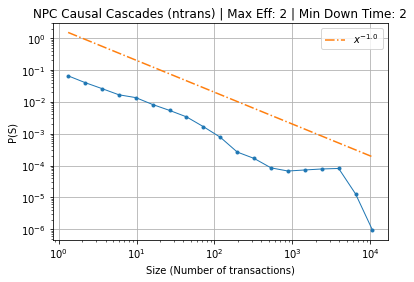

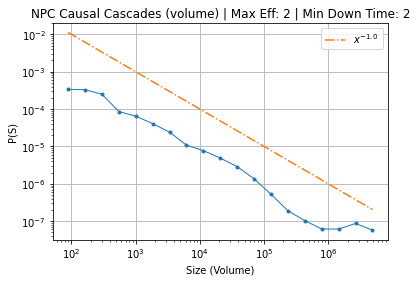

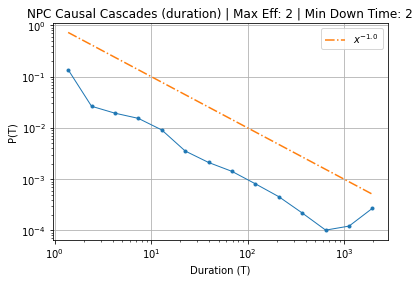

In [8]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_npc_500_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

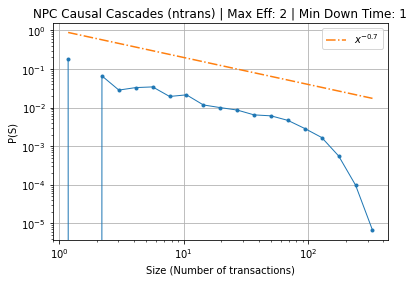

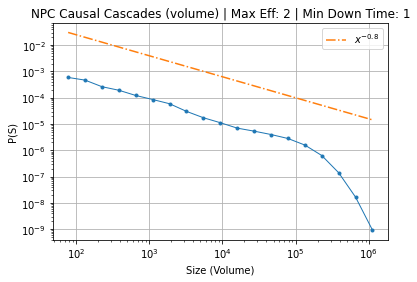

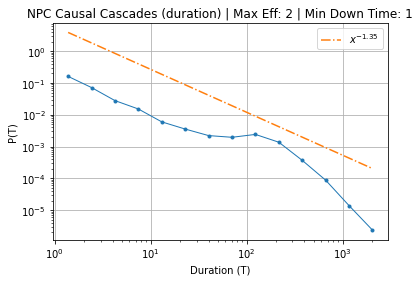

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

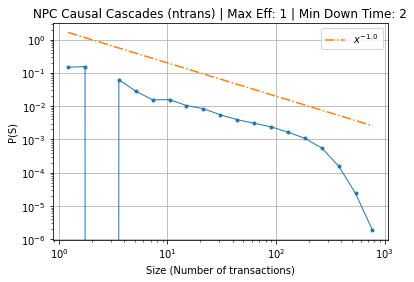

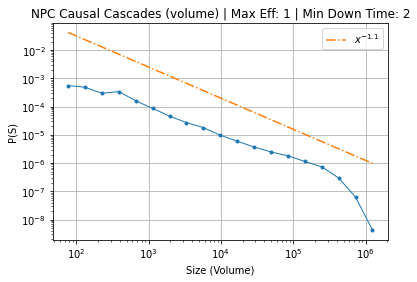

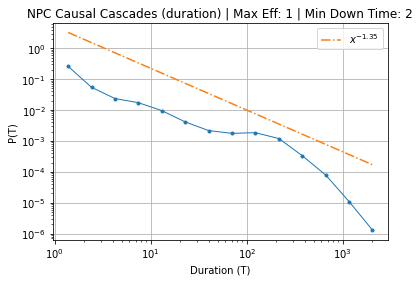

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

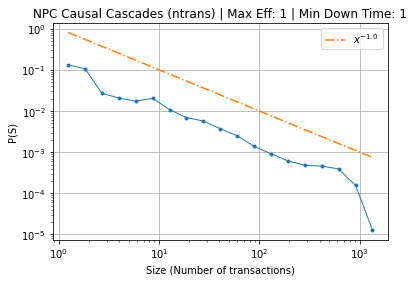

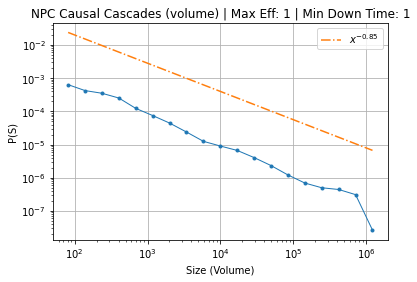

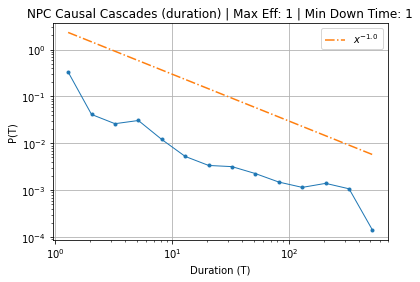

In [9]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.85)*1, '-.', label= "$x^{-0.85}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.)*3, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
